**imports**

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import math

%matplotlib inline
plt.style.use('bmh')

ENDPOINT_URL = 'http://localhost:2121'


**example JSON**

In [138]:
post_JSON = {
	"name": "Test Dataset",
	"systemId": 19149,
	"groupBy": [],
	"filters": [
		{
			"name": "Empty filter",
			"operation" :"",
			"rules":{},	
			"metric_rules": []
		}
	],
	"modulo": {
		"field": "token",
		"modulo": 50,
		"equals": 0
	},
	"fields" : 
		[
			{
				"name": "device",
				"type": "CATEGORICAL",
				"operations": [
					{
						"name": "",
						"values": []
					}
				],
				"na": {
					"name": "",
					"values": []
				},
				"isPredictor": False
			},
			{
				"name": "city",
				"type": "CATEGORICAL",
				"operations": [
					{
						"name": "",
						"values": []
					}
				],
				"na": {
					"name": "",
					"values": []
				},
				"isPredictor": False
			},
			{
				"name": "event_time",
				"type": "NUMERIC",
				"operations": [
					{
						"name": "MIN_MAX",
						"values": []
					}
				],
				"outliers": {
					"name": "",
					"values": []
				},
				"na": {
					"name": "",
					"values": []
				},
				"formula": {
					"metrics": ["event_time"],
					"operations": "%s"	
				}
			},
			{
				"name": "viewtime",
				"type": "NUMERIC",
				"operations": [
					{
						"name": "",
						"values": []
					}
				],
				"outliers": {
					"name": "",
					"values": []
				},
				"na": {
					"name": "",
					"values": []
				},
				"formula": {
					"metrics": ["viewtime"],
					"operations": "%s"	
				},
				"isY": True
			},
			{
				"name": "startup_time",
				"type": "NUMERIC",
				"operations": [
					{
						"name": "MIN_MAX",
						"values": []
					}
				],
				"outliers": {
					"name": "",
					"values": []
				},
				"na": {
					"name": "",
					"values": []
				},
				"formula": {
					"metrics": ["startup_time"],
					"operations": "%s"	
				}
			},
			{
				"name": "duration",
				"type": "NUMERIC",
				"operations": [
					{
						"name": "MIN_MAX",
						"values": []
					}
				],
				"outliers": {
					"name": "",
					"values": []
				},
				"na": {
					"name": "",
					"values": []
				},
				"formula": {
					"metrics": ["duration"],
					"operations": "%s"	
				}
			},
			{
				"name": "effective_time",
				"type": "NUMERIC",
				"operations": [
					{
						"name": "MIN_MAX",
						"values": []
					}
				],
				"outliers": {
					"name": "",
					"values": []
				},
				"na": {
					"name": "",
					"values": []
				},
				"formula": {
					"metrics": ["effective_time"],
					"operations": "%s"	
				}
			},
			{
				"name": "happiness_score",
				"type": "NUMERIC",
				"operations": [
					{
						"name": "MIN_MAX",
						"values": []
					}
				],
				"outliers": {
					"name": "",
					"values": []
				},
				"na": {
					"name": "",
					"values": []
				},
				"formula": {
					"metrics": ["happiness_score"],
					"operations": "%s"	
				}
			},
			{
				"name": "buffer_ratio",
				"type": "NUMERIC",
				"operations": [
					{
						"name": "MIN_MAX",
						"values": []
					}
				],
				"outliers": {
					"name": "",
					"values": []
				},
				"na": {
					"name": "",
					"values": []
				},
				"formula": {
					"metrics": ["buffer_ratio"],
					"operations": "%s"	
				}
			},
			{
				"name": "throughput",
				"type": "NUMERIC",
				"operations": [
					{
						"name": "MIN_MAX",
						"values": []
					}
				],
				"outliers": {
					"name": "MIN_MAX",
					"values": []
				},
				"na": {
					"name": "",
					"values": []
				},
				"formula": {
					"metrics": ["throughput"],
					"operations": "%s"	
				}
			}
		]
}

**stats parameters**

In [37]:
systemId = 19149
other_id = 63
fromDate = '2019-02-21 00:00:00'
toDate = '2019-02-21 02:00:00'

**get stats**

In [141]:
stats_url = '{base}/stats'.format(base=ENDPOINT_URL)


stats_params = {
    'systemId': systemId,
    'id': other_id,
    'fromDate': fromDate,
    'toDate': toDate
}

stats_response = requests.post(url = stats_url, params = stats_params, data=post_JSON)
print(stats_response)
# statistics = json.loads(stats_response.text)
# print(json.dumps(statistics, indent=2))

<Response [412]>


In [134]:
numerical_data = [item for item in statistics if item.get('stats')]

# consts
number_of_plots = len(numerical_data)
number_of_columns = 3
number_of_rows = math.ceil(number_of_plots / number_of_columns) 
font_size = 10
hori_space = 0.4
vert_space = 0.4
fig_size = (15, 15)

def format_boxplot_data (data, label):
    item = {}
    item['mean'] = data['mean']
    item['med'] = data['median']
    item['q1'] = data['Q1']
    item['q3'] = data['Q3']
    item['cilo'] = data['min']
    item['cihi'] = data['max']
    item['whislo'] = data['bottomLimit']
    item['whishi'] = data['topLimit']
    item['label'] = label
    return [item]

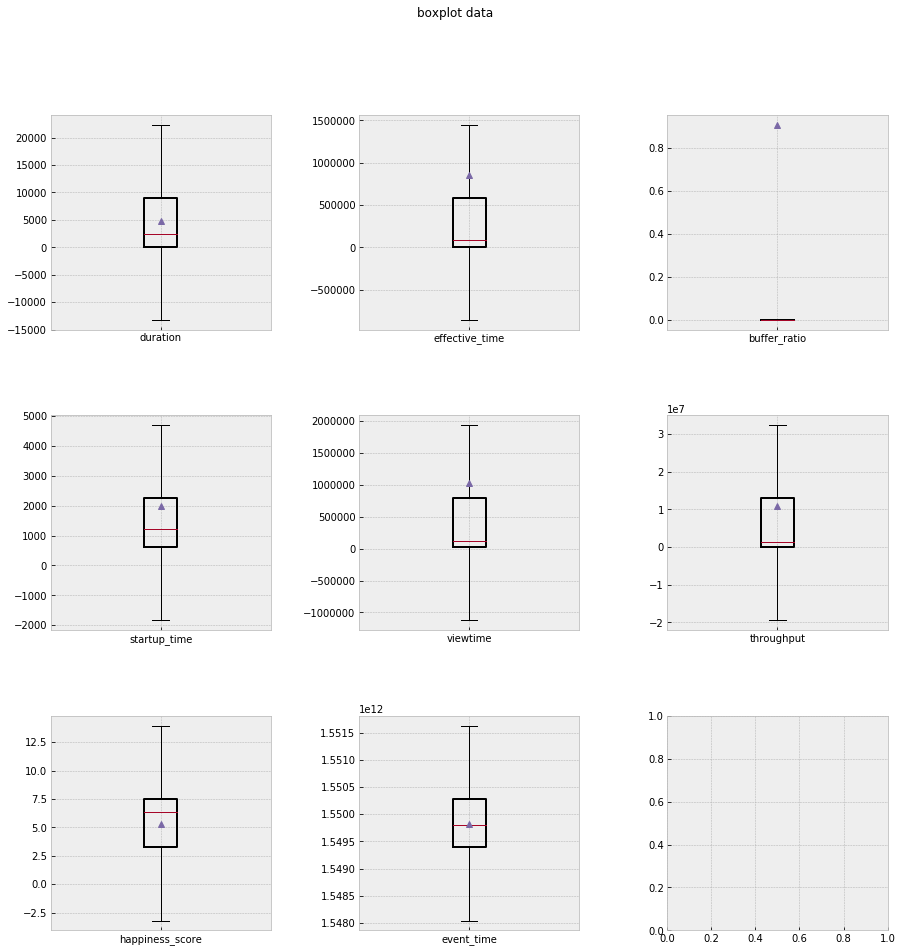

In [137]:
fig, axes = plt.subplots(nrows=number_of_rows, ncols=number_of_columns, figsize=fig_size)

all_plot_data = []
for index, data in enumerate(numerical_data):
    formatted_stats = format_boxplot_data(data['stats'], data['field'])
    all_plot_data.append(formatted_stats)
    
plot_index = 0
for i in range(number_of_rows):
    for j in range(number_of_columns):
        if plot_index < number_of_plots:
            axes[i, j].bxp(all_plot_data[plot_index], showfliers = False, showmeans=True)
            plot_index += 1

fig.suptitle('boxplot data')
fig.subplots_adjust(hspace=hori_space, wspace=vert_space)
        